In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib.colors import ListedColormap

from knn import KNNClassifier, euclidean, manhattan, minkowski, classifyArray

In [2]:

def getLabelColor(i):
	return ['g', 'r', 'b', 'y'][i]

# Training sets.
kTestSet = [1, 3, 5, 7]
funcSet = [euclidean, manhattan, minkowski]

style.use('fast')

df = pd.read_csv("microchips.csv")

# Train Data.
X = np.array(df.drop(['id'], 1))
y = np.array(df['id'])

# Test data.
test_X = [[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]]
test_Y = [0, 1, 1]

/tmp/ipykernel_216692/4147717144.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['id'], 1))


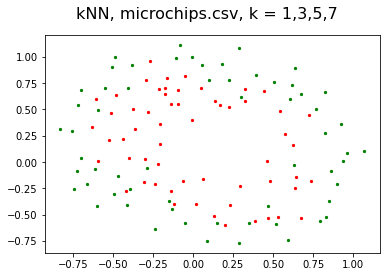

In [3]:

# Display the original data set.
plt.suptitle("kNN, microchips.csv, k = 1,3,5,7", fontsize=16)
for x, label in zip(X, y):
	plt.scatter(x[0], x[1], s=5, color=getLabelColor(label))
plt.show()



Text(0.5, 0.98, 'kNN, microchips.csv, k = 1,3,5,7')

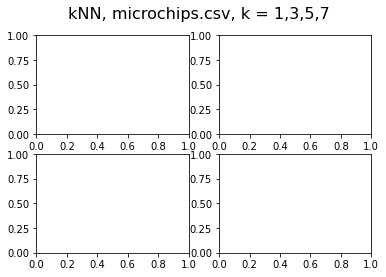

In [4]:
#
f, kplots = plt.subplots(2, 2)
plt.suptitle("kNN, microchips.csv, k = 1,3,5,7", fontsize=16)
# for xplot in kplots:
#    for yplot in xplot:
#        for x, label in zip(X, y):
#

In [5]:


# For each k test.
for i, k in enumerate(kTestSet):
	accuracy = 0
	plot = kplots[0 + int(i / 2)][i % 2]

	# Mesh plot colors
	cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
	cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

	h = .02

	#
	x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
						 np.arange(y_min, y_max, h))
	xy_mesh = np.c_[xx.ravel(), yy.ravel()]  # Turn to Nx2 matrix

	#
	#    plot.set_xlim(xx.min(), xx.max())
	#    plot.set_ylim(yy.min(), yy.max())

	#
	classes = classifyArray(X, y, k, xy_mesh)  # Classify mesh
	clz_mesh = classes.reshape(xx.shape)  # Return to mesh shape

	plot.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)

	for tX, tY in zip(test_X, test_Y):
		knn = KNNClassifier(X, y, tX, k)
		if knn == tY:
			accuracy = accuracy + 1
		# Check if correct
		print("k:", k, " X test: ", tX, "\t\texpected:", tY, "actual:", knn)

		plot.scatter(tX[0], tX[1], s=40, color=getLabelColor(knn))
	plot.set_title("k={}, training error = {}, weights = {} - {}".format(k, len(test_X) - accuracy, "distance",
																		 euclidean.__name__))

	for _x, _y in zip(X, y):
		plot.scatter(_x[0], _x[1], s=5, color=getLabelColor(_y), marker='.', cmap=cmap_bold)

plt.show()


k: 1  X test:  [-0.3, 1.0] 		expected: 0 actual: 1
k: 1  X test:  [-0.5, -0.1] 		expected: 1 actual: 0
k: 1  X test:  [0.6, 0.0] 		expected: 1 actual: 0
k: 3  X test:  [-0.3, 1.0] 		expected: 0 actual: 0
k: 3  X test:  [-0.5, -0.1] 		expected: 1 actual: 0
k: 3  X test:  [0.6, 0.0] 		expected: 1 actual: 1
k: 5  X test:  [-0.3, 1.0] 		expected: 0 actual: 0
k: 5  X test:  [-0.5, -0.1] 		expected: 1 actual: 1
k: 5  X test:  [0.6, 0.0] 		expected: 1 actual: 1
k: 7  X test:  [-0.3, 1.0] 		expected: 0 actual: 0
k: 7  X test:  [-0.5, -0.1] 		expected: 1 actual: 0
k: 7  X test:  [0.6, 0.0] 		expected: 1 actual: 1
